## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from yellowbrick.classifier import ConfusionMatrix 
from yellowbrick.classifier import ClassificationReport 
from yellowbrick.classifier import ROCAUC 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from yellowbrick.features import Rank2D 

In [2]:
#Import datasets into dataframes
State = pd.read_csv("RDC_Inventory_Core_Metrics_State_Monthly_History.csv")
mtg = pd.read_excel("Monthly-National-Statistics-for-New-Residential-Mortgages-in-the-United-States.xlsx", sheet_name = 'ALL_LOANS', skiprows = 9, header = None)

/home/kim/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


## Data Cleaning

In [3]:
#Snapshot of State
State.tail()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
3312,201607,connecticut,ct,349900.0,NaN,NaN,27114.0,NaN,NaN,77.0,...,749721.0238,NaN,NaN,32454.0,NaN,NaN,0.196946,NaN,NaN,0.0
3313,201607,minnesota,mn,241900.0,NaN,NaN,26217.0,NaN,NaN,60.0,...,335434.4096,NaN,NaN,39898.0,NaN,NaN,0.521837,NaN,NaN,0.0
3314,201607,pennsylvania,pa,185000.0,NaN,NaN,65960.0,NaN,NaN,78.0,...,272396.3767,NaN,NaN,86168.0,NaN,NaN,0.306367,NaN,NaN,0.0
3315,201607,ohio,oh,139900.0,NaN,NaN,47770.0,NaN,NaN,64.0,...,217634.1462,NaN,NaN,65950.0,NaN,NaN,0.380574,NaN,NaN,0.0
3316,quality_flag = 1: year-over-year figures may ...,please contact economics@realtor.com for more...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We can see the last row is invalid data, so we can remove this row with no effect to the overall data

In [4]:
print ('Original length of rows: ', len(State['state']))
print ('Removing row with invalid data...')
State = State.drop([3316])
print ('New length of rows: ', len(State['state']))

Original length of rows:  3317
Removing row with invalid data...
New length of rows:  3316


In [5]:
#Extracting month and year from month_date_yyyymm column
State['year'] = State['month_date_yyyymm'].str[:4]
State['month'] = State['month_date_yyyymm'].str[4:]
State.head()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,year,month
0,202111,texas,tx,349900.0,-0.0003,0.1342,48300.0,-0.0614,-0.2288,46.0,...,0.0798,100196.0,-0.0259,-0.1370,1.074451,0.0756,0.2206,0.0,2021,11
1,202111,montana,mt,549000.0,0.0358,0.3727,2304.0,-0.1560,-0.2192,78.0,...,0.2449,5094.0,-0.1214,-0.1601,1.210938,0.0871,0.1557,1.0,2021,11
2,202111,utah,ut,588542.5,0.0236,0.1064,4476.0,-0.1569,-0.0345,37.5,...,0.0582,13758.0,-0.0573,-0.0182,2.073727,0.3246,0.0511,0.0,2021,11
3,202111,delaware,de,396950.0,0.0049,0.1345,1608.0,-0.0920,-0.2141,52.0,...,0.0321,4599.0,-0.0671,-0.1285,1.860075,0.0763,0.2809,0.0,2021,11
4,202111,nevada,nv,459495.0,0.0211,0.3128,6921.0,-0.0719,-0.2536,35.5,...,0.2274,8705.0,-0.0629,-0.2256,0.257766,0.0121,0.0455,1.0,2021,11


In [6]:
#Creating new column with full datetime format
State['date'] = pd.to_datetime(State[['year', 'month']].assign(DAY=1))
State.head()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,year,month,date
0,202111,texas,tx,349900.0,-0.0003,0.1342,48300.0,-0.0614,-0.2288,46.0,...,100196.0,-0.0259,-0.1370,1.074451,0.0756,0.2206,0.0,2021,11,2021-11-01
1,202111,montana,mt,549000.0,0.0358,0.3727,2304.0,-0.1560,-0.2192,78.0,...,5094.0,-0.1214,-0.1601,1.210938,0.0871,0.1557,1.0,2021,11,2021-11-01
2,202111,utah,ut,588542.5,0.0236,0.1064,4476.0,-0.1569,-0.0345,37.5,...,13758.0,-0.0573,-0.0182,2.073727,0.3246,0.0511,0.0,2021,11,2021-11-01
3,202111,delaware,de,396950.0,0.0049,0.1345,1608.0,-0.0920,-0.2141,52.0,...,4599.0,-0.0671,-0.1285,1.860075,0.0763,0.2809,0.0,2021,11,2021-11-01
4,202111,nevada,nv,459495.0,0.0211,0.3128,6921.0,-0.0719,-0.2536,35.5,...,8705.0,-0.0629,-0.2256,0.257766,0.0121,0.0455,1.0,2021,11,2021-11-01


In [7]:
#Capitalize state and state_id columns
State['state'] = State['state'].str.capitalize()
State['state_id'] = State['state_id'].str.capitalize()

In [8]:
#Checking number of NaN's per column in State
State_columns = State.columns
for item in State_columns:
    print("Number of NaN's for ", item, "- {}".format(State[item].isnull().sum()))

Number of NaN's for  month_date_yyyymm - 0
Number of NaN's for  state - 0
Number of NaN's for  state_id - 0
Number of NaN's for  median_listing_price - 0
Number of NaN's for  median_listing_price_mm - 613
Number of NaN's for  median_listing_price_yy - 613
Number of NaN's for  active_listing_count - 0
Number of NaN's for  active_listing_count_mm - 613
Number of NaN's for  active_listing_count_yy - 613
Number of NaN's for  median_days_on_market - 0
Number of NaN's for  median_days_on_market_mm - 613
Number of NaN's for  median_days_on_market_yy - 613
Number of NaN's for  new_listing_count - 0
Number of NaN's for  new_listing_count_mm - 613
Number of NaN's for  new_listing_count_yy - 613
Number of NaN's for  price_increased_count - 0
Number of NaN's for  price_increased_count_mm - 614
Number of NaN's for  price_increased_count_yy - 614
Number of NaN's for  price_reduced_count - 0
Number of NaN's for  price_reduced_count_mm - 613
Number of NaN's for  price_reduced_count_yy - 613
Number of 

In [9]:
#Dropping columns with NAs. 
statedf = State.drop(columns = ['median_listing_price_mm', 'median_listing_price_yy', 
                     'active_listing_count_mm', 'active_listing_count_yy',
                     'median_days_on_market_mm', 'median_days_on_market_yy',
                     'new_listing_count_mm', 'new_listing_count_yy', 
                     'price_increased_count_mm', 'price_increased_count_yy',
                     'price_reduced_count_mm', 'price_reduced_count_yy', 
                     'pending_listing_count_mm', 'pending_listing_count_yy', 
                     'median_listing_price_per_square_foot_mm', 'median_listing_price_per_square_foot_yy', 
                     'median_square_feet_mm', 'median_square_feet_yy', 
                     'average_listing_price_mm', 'average_listing_price_yy', 
                     'total_listing_count_mm', 'total_listing_count_yy', 
                     'pending_ratio_mm', 'pending_ratio_yy'])

#Since these are month over month and year over year columns (i.e. not data we're looking for), this shouldn't affect the analysis)

statedf_columns = statedf.columns
for item in statedf_columns:
    print("Number of NaN's for ", item, "- {}".format(statedf[item].isnull().sum()))

Number of NaN's for  month_date_yyyymm - 0
Number of NaN's for  state - 0
Number of NaN's for  state_id - 0
Number of NaN's for  median_listing_price - 0
Number of NaN's for  active_listing_count - 0
Number of NaN's for  median_days_on_market - 0
Number of NaN's for  new_listing_count - 0
Number of NaN's for  price_increased_count - 0
Number of NaN's for  price_reduced_count - 0
Number of NaN's for  pending_listing_count - 0
Number of NaN's for  median_listing_price_per_square_foot - 0
Number of NaN's for  median_square_feet - 0
Number of NaN's for  average_listing_price - 0
Number of NaN's for  total_listing_count - 0
Number of NaN's for  pending_ratio - 21
Number of NaN's for  quality_flag - 0
Number of NaN's for  year - 0
Number of NaN's for  month - 0
Number of NaN's for  date - 0


In [10]:
statedf.state.unique()

array(['Texas', 'Montana', 'Utah', 'Delaware', 'Nevada', 'Georgia',
       'District of columbia', 'Washington', 'Michigan', 'Kansas',
       'Alaska', 'New york', 'Wyoming', 'California', 'Arizona',
       'Louisiana', 'South carolina', 'Colorado', 'Connecticut',
       'Tennessee', 'Alabama', 'Florida', 'Vermont', 'Indiana',
       'North dakota', 'Iowa', 'New jersey', 'Virginia', 'Kentucky',
       'Illinois', 'Oklahoma', 'Maryland', 'New hampshire', 'Minnesota',
       'Massachusetts', 'Missouri', 'Pennsylvania', 'Mississippi',
       'Idaho', 'West virginia', 'Wisconsin', 'South dakota', 'Ohio',
       'Nebraska', 'Rhode island', 'Oregon', 'North carolina',
       'New mexico', 'Maine', 'Arkansas', 'Hawaii', 'Marshall islands'],
      dtype=object)

In [11]:
statedf.head()

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag,year,month,date
0,202111,Texas,Tx,349900.0,48300.0,46.0,28756.0,3352.0,12584.0,51896.0,168.507812,2059.5,5.019308e+05,100196.0,1.074451,0.0,2021,11,2021-11-01
1,202111,Montana,Mt,549000.0,2304.0,78.0,704.0,20.0,352.0,2790.0,261.348171,2140.0,1.057252e+06,5094.0,1.210938,1.0,2021,11,2021-11-01
2,202111,Utah,Ut,588542.5,4476.0,37.5,3396.0,316.0,1440.0,9282.0,244.021488,2513.5,1.118959e+06,13758.0,2.073727,0.0,2021,11,2021-11-01
3,202111,Delaware,De,396950.0,1608.0,52.0,1024.0,132.0,348.0,2991.0,191.669123,2005.0,4.897016e+05,4599.0,1.860075,0.0,2021,11,2021-11-01
4,202111,Nevada,Nv,459495.0,6921.0,35.5,3904.0,272.0,1756.0,1784.0,242.409259,1925.0,7.586710e+05,8705.0,0.257766,1.0,2021,11,2021-11-01


In [12]:
#Create column list for mtg data
mtg_cols = ['Month', 
             'Number of Originations (1,000s)', 
             'Average Loan Amount (1,000 $)', 
             'Average Purchase Price / Appraised Value (1000$)',
             'Average Contract Rate', 
             '% Share Owner-Occupied Property', 
             'Home Purchase Originations - First Time Homebuyer %', 
             'Home Purchase Originations - Repeat Homebuyer %', 
             'Home Purchase Originations - All Home Purchase %', 
             'Refinance Originations - Cashout Refinance %', 
             'Refinance Originations - Rate and Term Refinance %', 
             'Refinance Originations - All Refinance %',
             'Average Term to Maturity (Yrs.)', 
             'Mortgage Terms - Adjustable-Rate Mortgages %', 
             'Mortgage Terms - 15-Year Fixed Rate Mortgages %', 
             'Mortgage Terms - 20- and 30-Year Fixed Rate Mortgages %', 
             'Back-End Debt-to-Income Ratio - Average DTI', 
             'Back-End Debt-to-Income Ratio - % Less Than or Equal To 36', 
             'Back-End Debt-to-Income Ratio - % More than 36 To 43', 
             'Back-End Debt-to-Income Ratio - % Greater than 43', 
             'All Borrowers Credit Score - Average Credit Score', 
             'All Borrowers Credit Score - % Very Poor Credit', 
             'All Borrowers Credit Score - % Poor Credit', 
             'All Borrowers Credit Score - % Fair Credit', 
             'All Borrowers Credit Score - % Good Credit', 
             'All Borrowers Credit Score - % Excellent Credit',
             'Loan-to-Value - Average Loan-to-Value',
             'Loan-to-Value - Average Combined Loan-to-Value',
             'Loan-to-Value - 70.0% or Less Share by CLTV',
             'Loan-to-Value - 70.1 - 80.0% Share by CLTV',
             'Loan-to-Value - 80.1 - 90.0% Share by CLTV',
             'Loan-to-Value - 90.1 - 95.0% Share by CLTV',
             'Loan-to-Value - 95.1 - 97.0% Share by CLTV',
             'Loan-to-Value - Greater Than 97.0% Share by CLTV',
             '% Market Share - Government',
             '% Market Share - Enterprise',
             '% Market Share - Other Conforming (Portfolio)',
             '% Market Share - Jumbo Market',
             '% of Loans by All Borrowers’ Race - All White',
             '% of Loans by All Borrowers’ Race - All Black or African American',
             '% of Loans by All Borrowers’ Race - All Asian',
             '% of Loans by All Borrowers’ Race - All Native Hawaiian and Pacific Islander',
             '% of Loans by All Borrowers’ Race - All American Indian and Alaska Native',
             '% of Loans by All Borrowers’ Race - Multiple races',
             '% of Loans by All Borrowers’ Ethnicity - All Hispanic or Latino',
             '% of Loans by All Borrowers’ Ethnicity - At least one Hispanic or Latino',
             '% of Loans by All Borrowers’ Ethnicity - All White',
             '% of Loans by All Borrowers’ Ethnicity - Multiple races not Hispanic or Latino',
             'All Borrowers Ages - Average Age',
             'All Borrowers Ages - % Less Than 25',
             'All Borrowers Ages - % 25 to 34',
             'All Borrowers Ages - % 35 to 44',
             'All Borrowers Ages - % 45 to 54',
             'All Borrowers Ages - % 55 to 64',
             'All Borrowers Ages - % At Least 65',
             '% of Loans by # of Borrowers and Gender - One Borrower - Male',
             '% of Loans by # of Borrowers and Gender - One Borrower - Female',
             '% of Loans by # of Borrowers and Gender - Two Borrowers',
             '% of Loans by # of Borrowers and Gender - More than Two Borrowers'
            ]

In [13]:
#Update column names
mtg.columns = mtg_cols

In [14]:
#Convert Date column to datetime format to match State data
#mtg['Date'] = pd.to_datetime(mtg['Month'], format = '%Y-%m-%d')

In [15]:
#Create year and month columns to match State data
mtg['Year'] = pd.DatetimeIndex(mtg['Month']).year

#mtg['Month'] = pd.DatetimeIndex(mtg['Date']).month

In [16]:
mtg.head()

,Month,"Number of Originations (1,000s)","Average Loan Amount (1,000 $)",Average Purchase Price / Appraised Value (1000$),Average Contract Rate,% Share Owner-Occupied Property,Home Purchase Originations - First Time Homebuyer %,Home Purchase Originations - Repeat Homebuyer %,Home Purchase Originations - All Home Purchase %,Refinance Originations - Cashout Refinance %,...,All Borrowers Ages - % 25 to 34,All Borrowers Ages - % 35 to 44,All Borrowers Ages - % 45 to 54,All Borrowers Ages - % 55 to 64,All Borrowers Ages - % At Least 65,% of Loans by # of Borrowers and Gender - One Borrower - Male,% of Loans by # of Borrowers and Gender - One Borrower - Female,% of Loans by # of Borrowers and Gender - Two Borrowers,% of Loans by # of Borrowers and Gender - More than Two Borrowers,Year
0,1998-01-01,622,108,154,7.2,96.6,29.2,17.8,47.0,22.3,...,25.2,34.1,23.1,10.2,4.4,19.8,15.6,64.1,0.5,1998
1,1998-02-01,864,110,158,7.1,96.8,24.5,12.9,37.3,24.7,...,25.3,34.8,23.6,9.6,4.2,17.9,14.9,66.8,0.5,1998
2,1998-03-01,1063,108,155,7.2,96.6,26.9,13.7,40.6,24.9,...,24.8,34.1,24.1,10.0,4.3,17.9,15.1,66.5,0.6,1998
3,1998-04-01,994,108,154,7.2,96.3,29.2,18.2,47.5,25.1,...,24.8,33.7,24.0,10.2,4.4,18.6,15.9,64.9,0.6,1998
4,1998-05-01,932,109,153,7.3,96.3,31.0,20.5,51.5,23.9,...,25.5,33.1,23.9,9.9,4.4,19.4,16.4,63.6,0.6,1998


## Summary Statistics

In [17]:
statedf.describe()

,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag
count,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3.316000e+03,3316.000000,3295.000000,3316.000000
mean,313875.768245,21618.154704,69.301719,7955.331725,747.582630,5713.622437,8992.893848,167.154565,1932.929692,4.986186e+05,30611.048552,0.488739,0.054584
std,123624.989915,24934.130002,24.685484,8940.065597,1303.148551,7997.990658,12149.997052,91.304160,240.318858,2.709222e+05,35145.038151,0.472333,0.227200
min,134450.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,77.521459,990.000000,2.073366e+05,1.000000,0.000000,0.000000
25%,226086.250000,5974.750000,52.000000,1944.000000,100.000000,1108.000000,1518.000000,115.554632,1800.000000,3.027116e+05,8556.500000,0.163065,0.000000
50%,284950.000000,13012.000000,66.000000,4908.000000,296.000000,3024.000000,4409.000000,141.809305,1942.000000,4.023329e+05,19351.000000,0.330502,0.000000
75%,359900.000000,26213.250000,83.000000,9941.000000,756.000000,6761.000000,11158.750000,180.199015,2057.625000,6.014969e+05,36784.750000,0.642415,0.000000
max,764000.000000,163956.000000,210.000000,49740.000000,9984.000000,58396.000000,84759.000000,650.724085,2808.000000,1.652025e+06,218385.000000,2.939130,1.000000


In [18]:
statedf.describe(include=['object'])

,month_date_yyyymm,state,state_id,year,month
count,3316,3316,3316,3316,3316
unique,65,52,52,6,12
top,201901,Texas,Tx,2019,11
freq,52,65,65,613,306


In [19]:
mtg.describe()

,"Number of Originations (1,000s)","Average Loan Amount (1,000 $)",Average Purchase Price / Appraised Value (1000$),Average Contract Rate,% Share Owner-Occupied Property,Home Purchase Originations - First Time Homebuyer %,Home Purchase Originations - Repeat Homebuyer %,Home Purchase Originations - All Home Purchase %,Refinance Originations - Cashout Refinance %,Refinance Originations - Rate and Term Refinance %,...,All Borrowers Ages - % 25 to 34,All Borrowers Ages - % 35 to 44,All Borrowers Ages - % 45 to 54,All Borrowers Ages - % 55 to 64,All Borrowers Ages - % At Least 65,% of Loans by # of Borrowers and Gender - One Borrower - Male,% of Loans by # of Borrowers and Gender - One Borrower - Female,% of Loans by # of Borrowers and Gender - Two Borrowers,% of Loans by # of Borrowers and Gender - More than Two Borrowers,Year
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.00000,...,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,823.344086,203.627240,289.526882,5.454839,92.123297,22.499283,22.668817,45.164875,24.806452,30.02724,...,22.430108,28.169892,24.228674,14.739068,7.268100,28.288172,20.129032,50.990681,0.592473,2009.129032
std,340.691167,48.949145,69.704865,1.477957,2.553456,7.082687,6.807364,13.022213,6.995941,13.25124,...,2.653711,3.113089,1.769944,2.785577,2.482968,4.548733,2.195724,6.361421,0.159971,6.724634
min,305.000000,108.000000,149.000000,2.800000,87.100000,10.000000,9.700000,20.300000,15.300000,9.10000,...,15.800000,23.500000,20.800000,9.500000,3.800000,17.800000,14.900000,41.000000,0.300000,1998.000000
25%,586.500000,167.000000,257.000000,4.150000,90.000000,17.800000,16.700000,35.350000,18.800000,18.05000,...,20.900000,25.450000,22.800000,12.850000,4.700000,24.800000,18.550000,45.750000,0.500000,2003.000000
50%,761.000000,212.000000,304.000000,5.100000,92.200000,22.300000,23.600000,45.700000,22.400000,28.10000,...,22.800000,27.300000,24.100000,15.300000,6.900000,28.600000,20.200000,49.700000,0.600000,2009.000000
75%,996.500000,233.500000,328.000000,6.900000,94.300000,26.400000,28.100000,53.950000,31.400000,39.25000,...,24.100000,30.800000,25.400000,16.900000,9.550000,32.450000,21.100000,55.850000,0.700000,2015.000000
max,2476.000000,298.000000,455.000000,8.700000,96.800000,38.500000,36.900000,72.600000,40.400000,62.70000,...,28.400000,34.800000,28.800000,20.000000,12.200000,35.200000,25.600000,66.800000,1.000000,2021.000000


## Visual Explorations

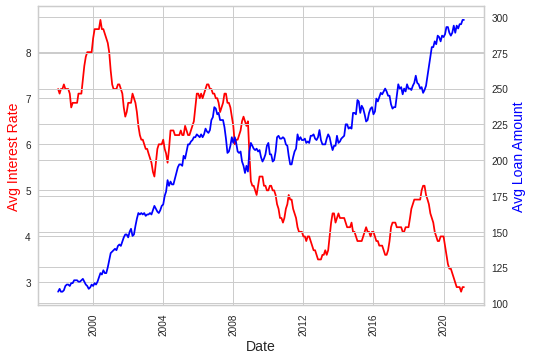

<Figure size 936x936 with 0 Axes>

In [20]:
fig,ax = plt.subplots()
plt.figure(figsize=(13,13))
# make a plot
ax.plot(mtg['Month'], mtg['Average Contract Rate'], color="red")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Avg Interest Rate",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(mtg.Month, mtg['Average Loan Amount (1,000 $)'], color="blue")
ax2.set_ylabel("Avg Loan Amount",color="blue",fontsize=14)

start, end = ax.get_xlim()
ax.xaxis.set_tick_params(rotation = 90)

plt.show()


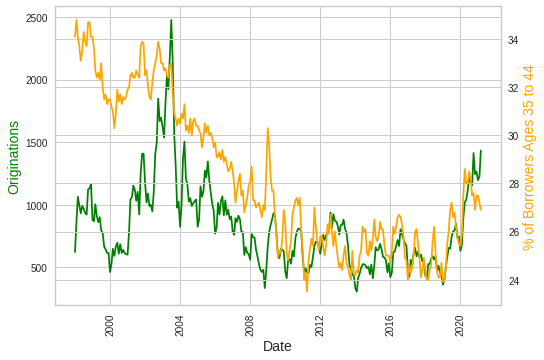

<Figure size 720x720 with 0 Axes>

In [21]:
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
# make a plot
ax.plot(mtg['Month'], mtg['Number of Originations (1,000s)'], color="green")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Originations",color="green",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(mtg['Month'], mtg['All Borrowers Ages - % 35 to 44'], color="orange")
ax2.set_ylabel("% of Borrowers Ages 35 to 44",color="orange",fontsize=14)

start, end = ax.get_xlim()
ax.xaxis.set_tick_params(rotation = 90)

plt.show()

#Calculate correlation

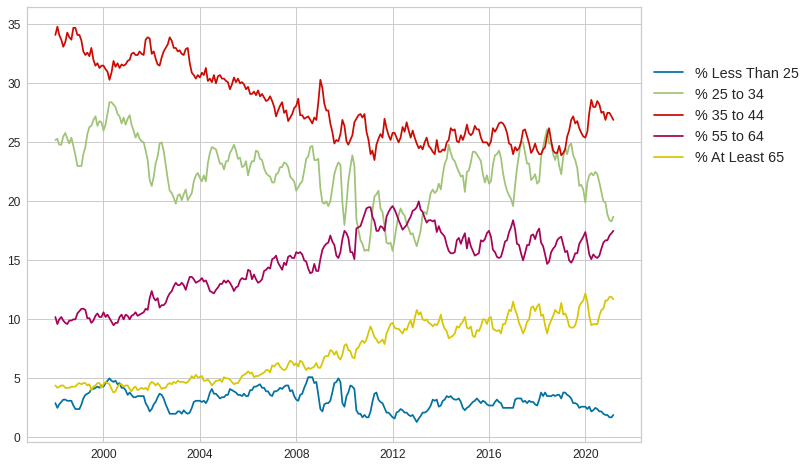

In [22]:
plt.rcParams["figure.figsize"] = (11,8)
#fig, ax = plt.subplots()


plt.plot(mtg['Month'],mtg['All Borrowers Ages - % Less Than 25'], label = "% Less Than 25")
plt.plot(mtg['Month'],mtg['All Borrowers Ages - % 25 to 34'], label = "% 25 to 34")
plt.plot(mtg['Month'],mtg['All Borrowers Ages - % 35 to 44'], label = "% 35 to 44")
plt.plot(mtg['Month'],mtg['All Borrowers Ages - % 55 to 64'], label = "% 55 to 64")
plt.plot(mtg['Month'],mtg['All Borrowers Ages - % At Least 65'], label = "% At Least 65")
#plt.set_ylabel("% of All Borrowers Ages", fontsize=14)
plt.xticks(fontsize = 'medium')
plt.yticks(fontsize = 'medium')
plt.legend(loc='center left', bbox_to_anchor=(1, .75), fontsize="large")

#ax2=ax.twinx()
#ax2.plot(mtg['Month'],mtg['All Borrowers Ages - Average Age'], label = "Average Age of All Borrowers", linestyle = "--")
#ax2.set_ylabel("Average Age of All Borrowers", color = 'blue', fontsize=14)

plt.show()



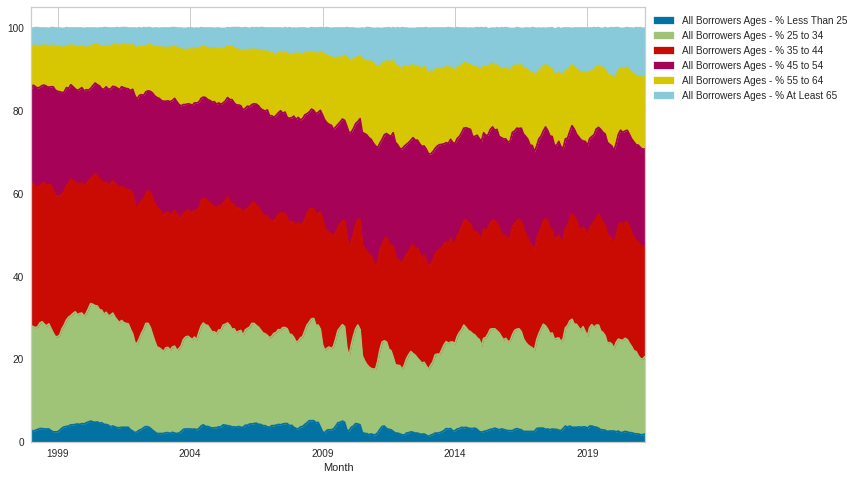

In [23]:
ages = mtg[['Month', 
           'All Borrowers Ages - % Less Than 25',
             'All Borrowers Ages - % 25 to 34',
             'All Borrowers Ages - % 35 to 44',
             'All Borrowers Ages - % 45 to 54',
             'All Borrowers Ages - % 55 to 64',
             'All Borrowers Ages - % At Least 65']]

ages.plot.area(x = 'Month').legend(bbox_to_anchor=(1.0, 1.0))

In [24]:
features = ['Average Contract Rate', 'Average Term to Maturity (Yrs.)', 
            'Back-End Debt-to-Income Ratio - Average DTI',
            'All Borrowers Credit Score - Average Credit Score', 
            'Loan-to-Value - Average Loan-to-Value', 
            '% Market Share - Government',
            '% of Loans by All Borrowers’ Race - All White',
            '% of Loans by All Borrowers’ Race - All Black or African American',
            '% of Loans by All Borrowers’ Race - All Asian',
            '% of Loans by All Borrowers’ Race - All Native Hawaiian and Pacific Islander',
            '% of Loans by All Borrowers’ Race - All American Indian and Alaska Native',
            '% of Loans by All Borrowers’ Race - Multiple races',
            '% of Loans by # of Borrowers and Gender - One Borrower - Male',
            '% of Loans by # of Borrowers and Gender - One Borrower - Female']

In [25]:
mtg.corr()["Number of Originations (1,000s)"].sort_values()

Loan-to-Value - Average Loan-to-Value                                            -0.734710
Loan-to-Value - 95.1 - 97.0% Share by CLTV                                       -0.669105
% Market Share - Government                                                      -0.640758
Loan-to-Value - Average Combined Loan-to-Value                                   -0.600858
Back-End Debt-to-Income Ratio - % More than 36 To 43                             -0.561886
% of Loans by # of Borrowers and Gender - More than Two Borrowers                -0.550583
Mortgage Terms - 20- and 30-Year Fixed Rate Mortgages %                          -0.548379
Loan-to-Value - 90.1 - 95.0% Share by CLTV                                       -0.538435
Home Purchase Originations - All Home Purchase %                                 -0.537352
Home Purchase Originations - Repeat Homebuyer %                                  -0.531272
Home Purchase Originations - First Time Homebuyer %                              -0.477193

In [26]:
#Subset of columns with an absolute value of correlation of at least 0.500
high_corr = mtg[['Number of Originations (1,000s)', 
                 'Loan-to-Value - 70.0% or Less Share by CLTV', 
                 'All Borrowers Ages - % 35 to 44', 
                 'Refinance Originations - All Refinance %', 
                 'Refinance Originations - Cashout Refinance %', 
                 'Loan-to-Value - Average Loan-to-Value', 
                 'Loan-to-Value - 95.1 - 97.0% Share by CLTV', 
                 '% Market Share - Government', 
                 'Loan-to-Value - Average Combined Loan-to-Value', 
                 'Back-End Debt-to-Income Ratio - % More than 36 To 43', 
                 '% of Loans by # of Borrowers and Gender - More than Two Borrowers', 
                 'Mortgage Terms - 20- and 30-Year Fixed Rate Mortgages %', 
                 'Loan-to-Value - 90.1 - 95.0% Share by CLTV', 
                 'Home Purchase Originations - All Home Purchase %',
                 'Home Purchase Originations - Repeat Homebuyer %']]

Text(0.5, 1.0, 'Correlation between all features in subset')

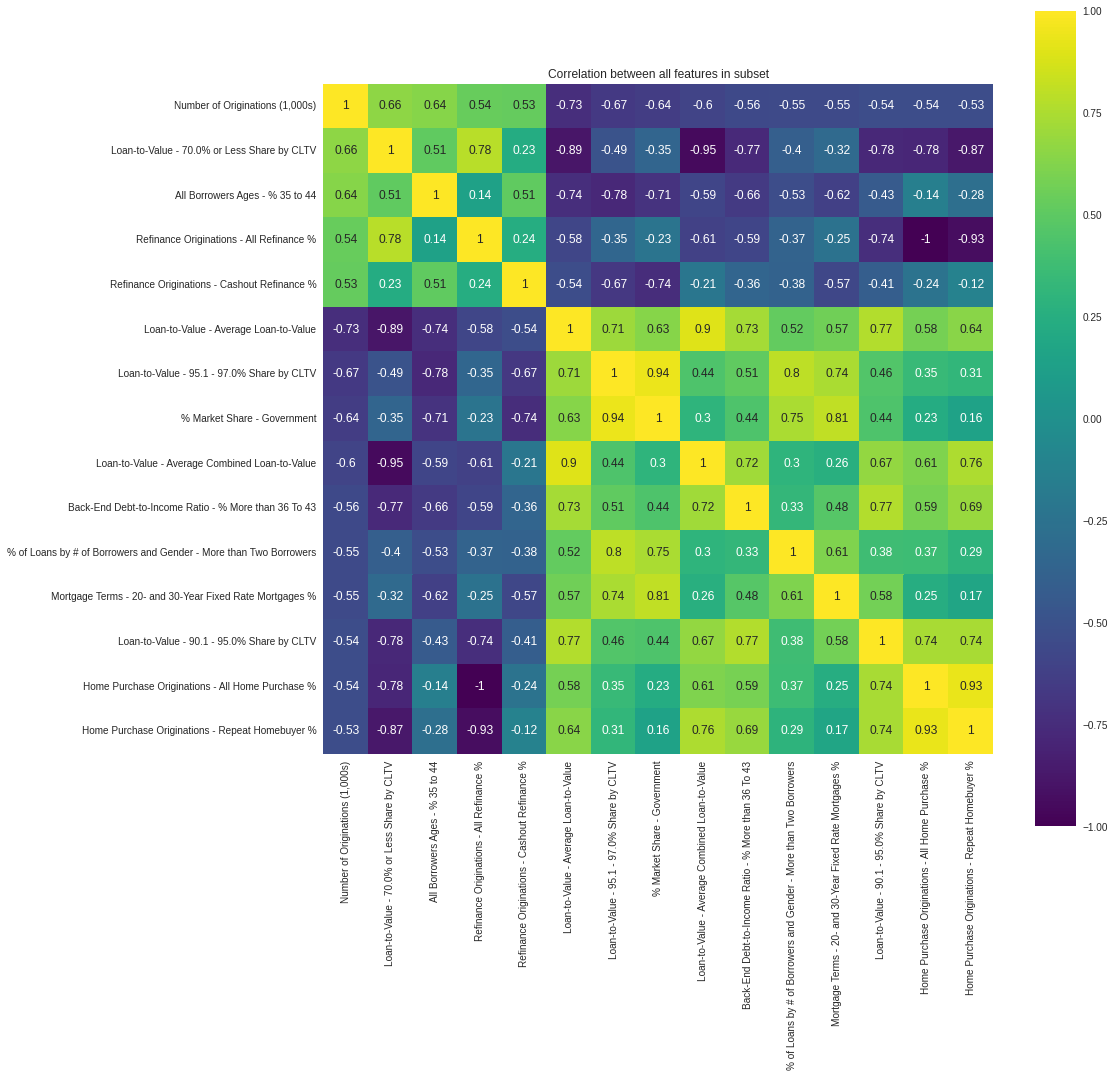

In [27]:
#Heatmap of correlation values across variables (need to select subset of variables)
correlation = high_corr.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between all features in subset')


/home/kim/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Originations (1,000s)', ylabel='Density'>

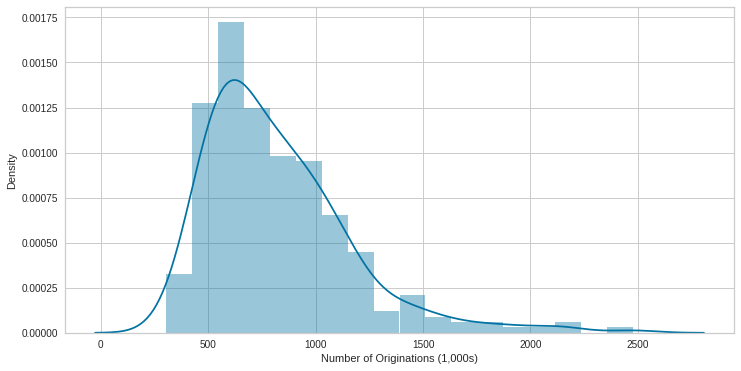

In [28]:
plt.figure(figsize=(12, 6))
sns.distplot(mtg['Number of Originations (1,000s)'])

In [29]:
statedf.corr()['median_days_on_market'].sort_values()

pending_ratio                          -0.498533
median_listing_price                   -0.344462
median_listing_price_per_square_foot   -0.275521
average_listing_price                  -0.252208
pending_listing_count                  -0.240370
new_listing_count                      -0.218133
price_increased_count                  -0.147053
quality_flag                           -0.109298
total_listing_count                    -0.080971
price_reduced_count                    -0.080031
median_square_feet                      0.000424
active_listing_count                    0.002998
median_days_on_market                   1.000000
Name: median_days_on_market, dtype: float64

In [30]:
high_state_corr = statedf[['median_days_on_market', 
              'pending_ratio', 
              'median_listing_price', 
              'median_listing_price_per_square_foot', 
              'average_listing_price',
              'pending_listing_count',
              'new_listing_count', 
              'price_increased_count', 
              'quality_flag' 
             ]]

Text(0.5, 1.0, 'Correlation between all features in subset')

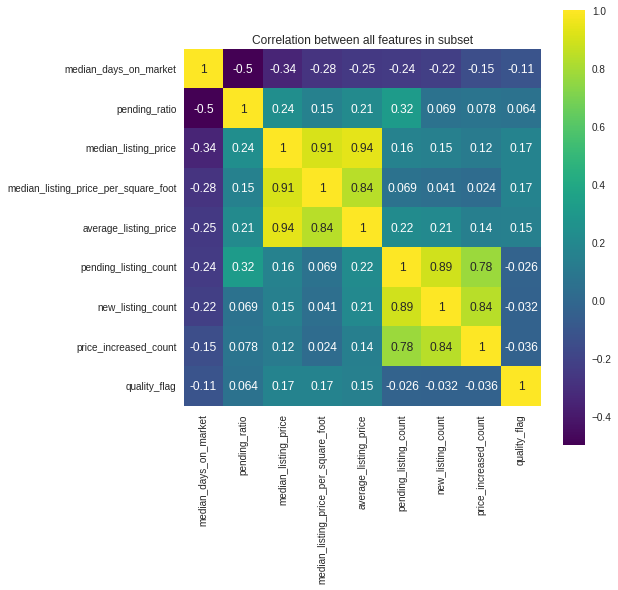

In [31]:
correlation = high_state_corr.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between all features in subset')

/home/kim/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_listing_count', ylabel='Density'>

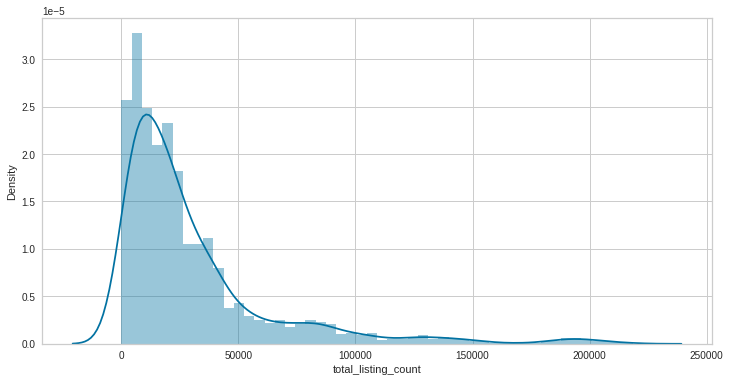

In [32]:
plt.figure(figsize=(12, 6))
sns.distplot(statedf['total_listing_count'])

In [33]:
mtg2017 = mtg[mtg['Year'] >= 2017].reset_index(drop = True)
mtg2017 = mtg2017[mtg2017['Year'] < 2021].reset_index(drop = True)
mtg2017.shape

(48, 60)

In [34]:
avg = mtg2017['Number of Originations (1,000s)'].mean()

# Creating column
mtg2017['highlow'] = np.where(mtg2017['Number of Originations (1,000s)'] >= avg, 1, 0)

In [35]:
stgrouped = statedf.groupby(['year','month']).mean().reset_index()
stgrouped["year"] = stgrouped["year"].astype(int)

In [36]:
stgrouped = stgrouped[stgrouped['year'] >= 2017]
stgrouped = stgrouped[stgrouped['year'] < 2021].reset_index(drop = True)
stgrouped.shape
#Then use mtg2016 and this grouped df to concatenate and do visualizations and modeling

(48, 15)

In [37]:
data_model_X = pd.concat([stgrouped, mtg2017[features]], axis = 1)
data_model_y = mtg2017['highlow']

In [38]:
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=30) 

print("No. of samples in training set: ", X_train.shape[0]) 
print('\n') 
print('Number of ratings in the training set:') 
print(y_train.value_counts()) 

print('\n') 

print("No. of samples in validation set:", X_val.shape[0]) 
print('\n') 
print('Number of ratings in the validation set:') 
print(y_val.value_counts())

No. of samples in training set:  33


Number of ratings in the training set:
0    24
1     9
Name: highlow, dtype: int64


No. of samples in validation set: 15


Number of ratings in the validation set:
0    8
1    7
Name: highlow, dtype: int64


In [39]:
model = LogisticRegression() 

1.0

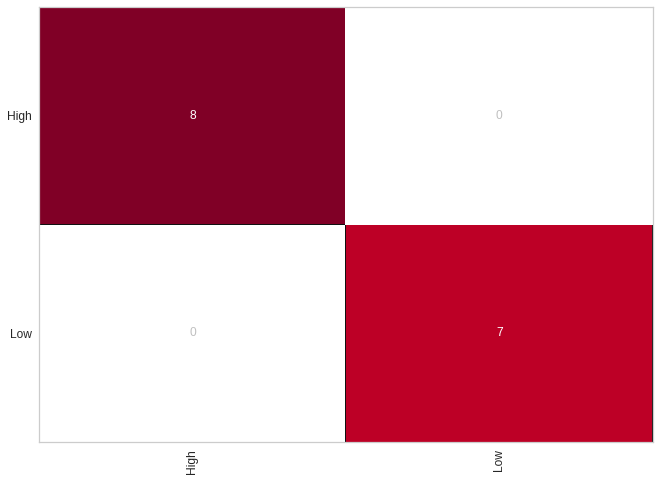

In [40]:
classes = ['High','Low'] 

cm = ConfusionMatrix(model, classes=classes, percent=False) 
cm = cm.fit(X_train, y_train)
cm.score(X_val, y_val) 

/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


1.0

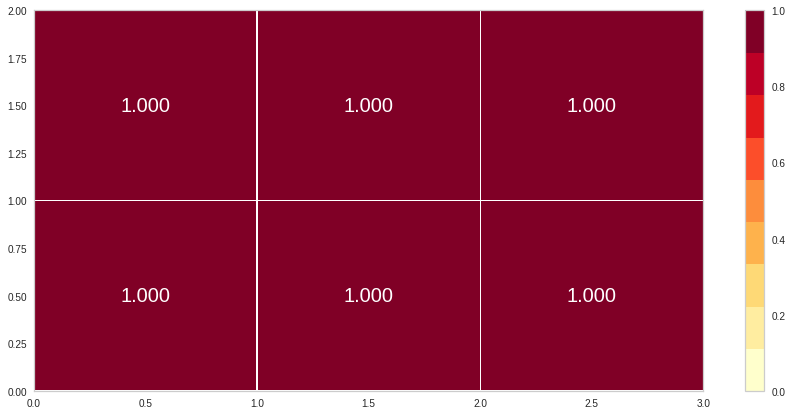

In [41]:
%matplotlib inline 

plt.rcParams['figure.figsize'] = (15, 7) 
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(model, classes=classes) 
visualizer = visualizer.fit(X_train, y_train)  
visualizer.score(X_val, y_val) 

1.0

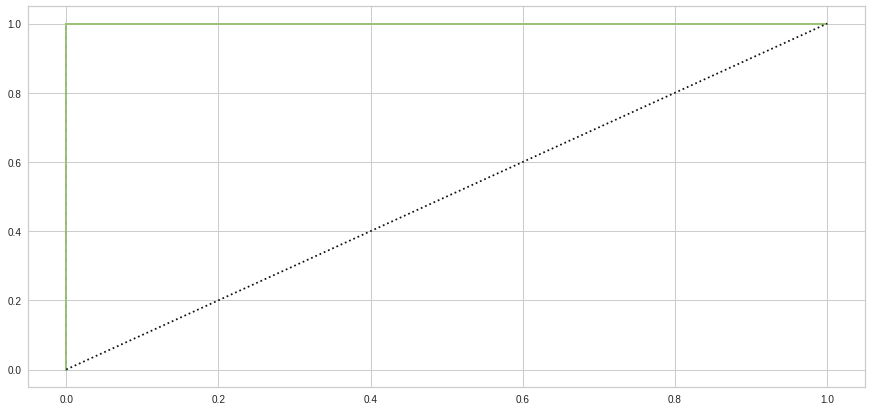

In [42]:
model = LogisticRegression() 
visualizer = ROCAUC(model)

visualizer = visualizer.fit(X_train, y_train) 
visualizer.score(X_val, y_val) 

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = dt.predict(X_val)

In [45]:
print (confusion_matrix(y_val, y_pred))

print (accuracy_score(y_val, y_pred))

print(classification_report(y_val, y_pred))

[[8 0]
 [0 7]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [46]:
y_pred_df = pd.DataFrame(y_pred)

In [47]:
# Reset the index of the input variables (was originally the episode number)
reindex_X = X_val.reset_index()

# Concat the input and output variables into one dataframe
total = pd.concat([reindex_X, y_pred_df], axis = 1)

# Pull rows that were predicted to have a higher than average rating
High_predict = total[total[0] == 1]

In [48]:
# Copy dataframe to remove the old index column
High_sum = High_predict.copy()
High_sum = High_sum.drop(columns=['index'])

In [49]:
High_sum.astype(int).apply(np.sum, axis=0).sort_values().tail(10)

All Borrowers Credit Score - Average Credit Score       5160
median_square_feet                                     13803
year                                                   14136
price_reduced_count                                    40772
new_listing_count                                      53225
pending_listing_count                                  65861
active_listing_count                                  158597
total_listing_count                                   224463
median_listing_price                                 2272817
average_listing_price                                3492027
dtype: int64

In [50]:
X = mtg2017[features]

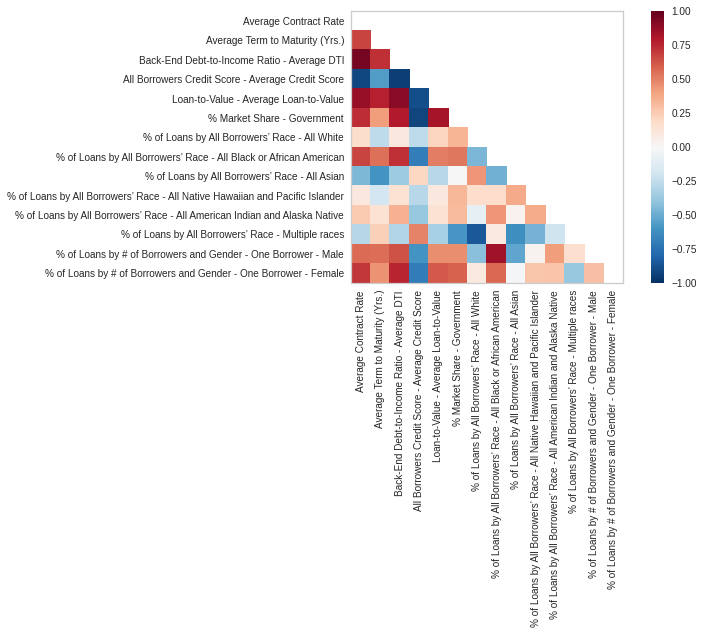

In [51]:
plt.rcParams['figure.figsize'] = (10, 5)

visualizer = Rank2D(features=features, algorithm='pearson') 
visualizer.fit(X)                
visualizer.transform(X)         
plt.show() 

Text(0.5, 1.0, 'Correlation between all features in subset')

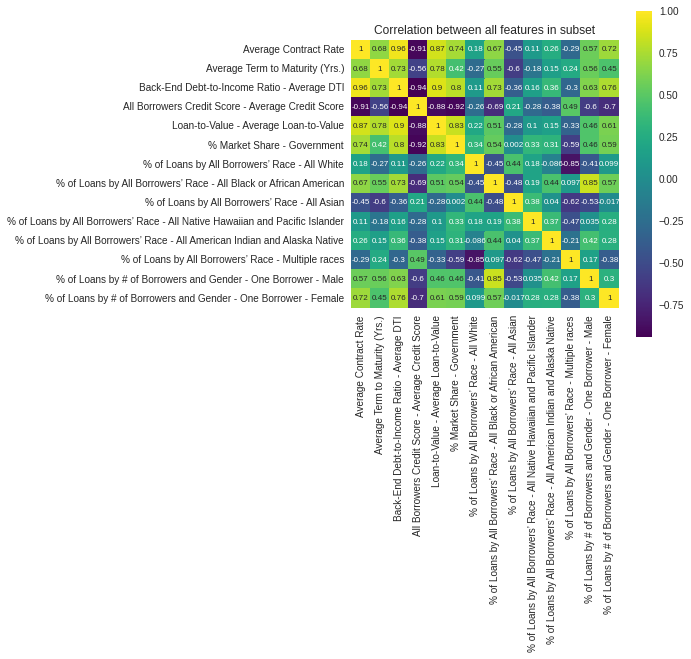

In [52]:
correlation = X.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, vmax=1, square=True,annot=True,annot_kws={"size": 8}, cmap='viridis')

plt.title('Correlation between all features in subset')

In [53]:
mtg.corr(method = 'spearman')['Average Loan Amount (1,000 $)'].sort_values()

% of Loans by # of Borrowers and Gender - Two Borrowers                          -0.750473
Average Contract Rate                                                            -0.732645
All Borrowers Credit Score - % Very Poor Credit                                  -0.726016
All Borrowers Ages - % 35 to 44                                                  -0.671486
Mortgage Terms - 15-Year Fixed Rate Mortgages %                                  -0.606381
Back-End Debt-to-Income Ratio - % Less Than or Equal To 36                       -0.573270
All Borrowers Credit Score - % Poor Credit                                       -0.536266
% Market Share - Other Conforming (Portfolio)                                    -0.516168
Loan-to-Value - 70.0% or Less Share by CLTV                                      -0.450741
Mortgage Terms - Adjustable-Rate Mortgages %                                     -0.441034
% of Loans by All Borrowers’ Race - All White                                    -0.421135

In [65]:
mtg2004 = mtg[mtg['Year'] >= 2004].reset_index(drop = True)

In [66]:
features2 = ['Number of Originations (1,000s)',
            'Average Contract Rate', 
            'Average Term to Maturity (Yrs.)', 
            'Back-End Debt-to-Income Ratio - Average DTI',
            'All Borrowers Credit Score - Average Credit Score', 
            'Loan-to-Value - Average Loan-to-Value', 
            '% Market Share - Government',
            '% of Loans by All Borrowers’ Race - All White',
            '% of Loans by All Borrowers’ Race - All Black or African American',
            '% of Loans by All Borrowers’ Race - All Asian',
            '% of Loans by All Borrowers’ Race - All Native Hawaiian and Pacific Islander',
            '% of Loans by All Borrowers’ Race - All American Indian and Alaska Native',
            '% of Loans by All Borrowers’ Race - Multiple races',
            '% of Loans by # of Borrowers and Gender - One Borrower - Male',
            '% of Loans by # of Borrowers and Gender - One Borrower - Female']

X = mtg2004[features2]

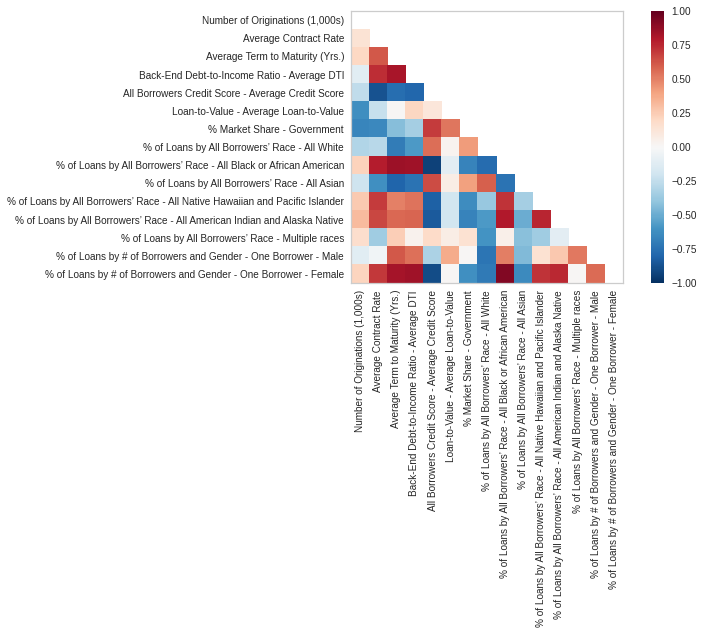

In [68]:
plt.rcParams['figure.figsize'] = (10, 5)

visualizer = Rank2D(features=features2, algorithm='pearson') 
visualizer.fit(X)                
visualizer.transform(X)         
plt.show() 